In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the processed dataset
data = pd.read_csv("processed_dataset.csv")
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,-0.522124,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1,-0.663421
1,0,-0.522124,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1,-0.681937
2,1,-0.206889,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1,-0.740967
3,1,0.423582,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5,-0.355619
4,1,-0.364507,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6,-0.169522


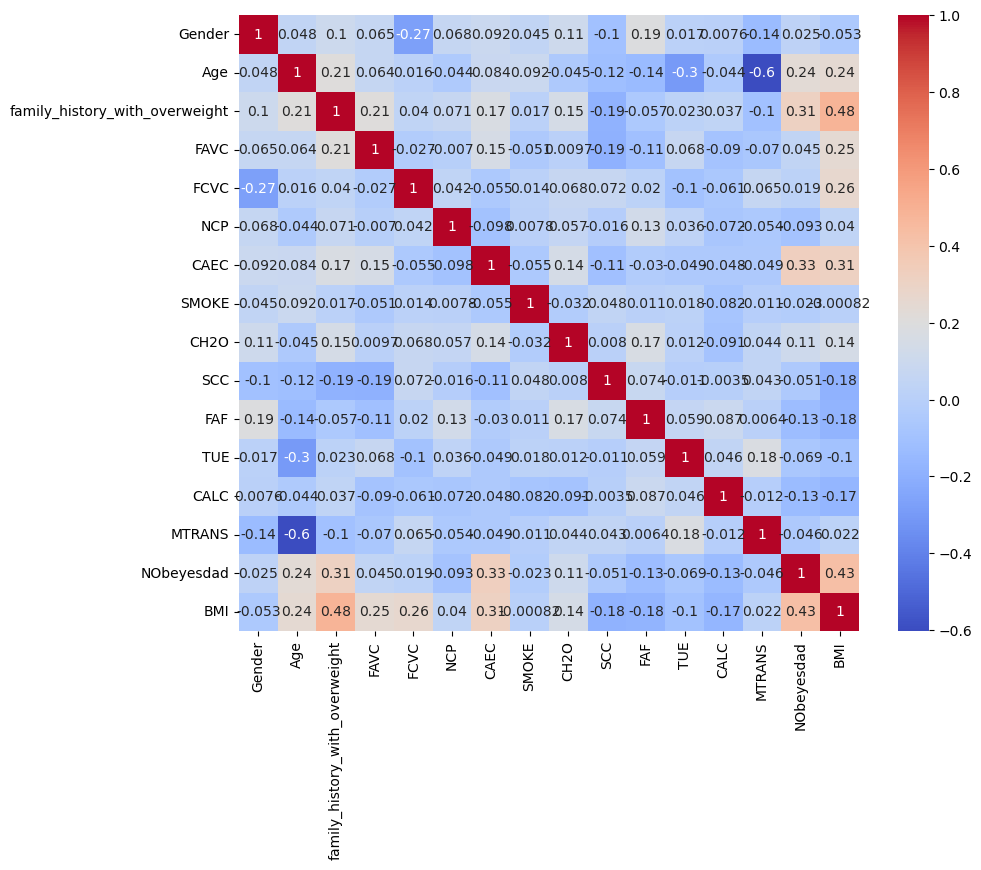

In [4]:
# 1. Analyze correlations between features and target variable (NObeyesdad)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
# 2. Feature Engineering: Create composite features or additional features
# Example: Calculate BMI (if not present) or create a score for eating habits (combining FAVC, FCVC, NCP)
# Let's create a composite score for dietary habits (FAVC, FCVC, NCP, and CAEC)
data['Dietary_Habits_Score'] = data['FAVC'] * 0.3 + data['FCVC'] * 0.3 + data['NCP'] * 0.2 + data['CAEC'] * 0.2

In [10]:
# 3. Encoding categorical variables
# We can use OneHotEncoder for columns like Gender, MTRANS, and family_history_with_overweight
categorical_features = ['Gender', 'MTRANS', 'family_history_with_overweight']
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], 
    remainder='passthrough'
)

In [12]:
# 4. Imputation for missing values (if any) before applying models
imputer = SimpleImputer(strategy='mean')

# 5. Train-test split (90% training, 10% testing)
X = data.drop(columns=['NObeyesdad', 'BMI'])  # 'BMI' is not used as a feature, just as an extra column
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
# 6. Building a classification model
# Example: RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', encoder),
    ('imputer', imputer),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Gender', 'MTRANS',
                                                   'family_history_with_overweight'])])),
                ('imputer', SimpleImputer()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [16]:
# 7. Evaluate the model
y_pred = pipeline.predict(X_test)

In [18]:
# 8. Displaying classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8443396226415094
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.71      0.69      0.70        35
           2       0.83      0.92      0.88        38
           3       0.97      0.91      0.94        35
           4       1.00      1.00      1.00        30
           5       0.68      0.68      0.68        22
           6       0.72      0.62      0.67        21

    accuracy                           0.84       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.84      0.84      0.84       212



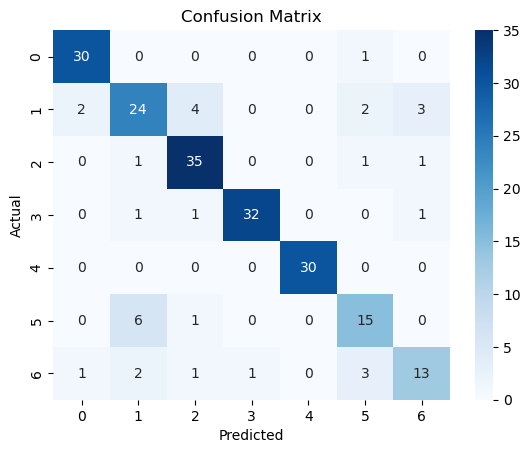

In [20]:
# 9. Additional performance analysis (Confusion Matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()